In [109]:
# 데이터 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv')
df = df.drop(columns=['Unnamed: 0'], axis=1)
df # 데이터 모양 확인

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [2]:
# M, K 속한 행 삭제
# 데이터 크기에 비해 해당 열이 적어 영향을 크게 주지 않는다.
drop_values = ['M','K']
df = df[~df['NA_Sales'].str.contains('|'.join(drop_values))]
df = df[~df['EU_Sales'].str.contains('|'.join(drop_values))]
df = df[~df['JP_Sales'].str.contains('|'.join(drop_values))]
df = df[~df['Other_Sales'].str.contains('|'.join(drop_values))]
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [3]:
# Sales column 숫자형 변경
df['NA_Sales'] = pd.to_numeric(df['NA_Sales'])
df['EU_Sales'] = pd.to_numeric(df['EU_Sales'])
df['JP_Sales'] = pd.to_numeric(df['JP_Sales'])
df['Other_Sales'] = pd.to_numeric(df['Other_Sales'])

df.info() # 데이터 타입 체크

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15813 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         15813 non-null  object 
 1   Platform     15813 non-null  object 
 2   Year         15559 non-null  float64
 3   Genre        15765 non-null  object 
 4   Publisher    15756 non-null  object 
 5   NA_Sales     15813 non-null  float64
 6   EU_Sales     15813 non-null  float64
 7   JP_Sales     15813 non-null  float64
 8   Other_Sales  15813 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.2+ MB


In [4]:
df.isnull().sum() # Null 값 체크

Name             0
Platform         0
Year           254
Genre           48
Publisher       57
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [5]:
df = df.dropna(axis=0) # 결측값 제거
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [6]:
def year(x): # 년도 데이터 수정
  if (x >= 0) & (x < 20):
    return int(2000 + x)
  elif (x > 30) & (x < 1000):
    return int(1900 + x)
  else:
    return int(x)

df['Year'] = df['Year'].apply(year)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [7]:
df.describe() # 요약

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,15476.000000,15476.000000,15476.000000,15476.000000,15476.000000
mean,2006.403851,0.263680,0.146372,0.077810,0.048344
std,5.834873,0.824188,0.510354,0.309821,0.192612
min,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000
max,2017.000000,41.490000,29.020000,10.220000,10.570000


In [8]:
# categorical Genre
num_Genre = df['Genre'].unique()
print(len(num_Genre))
num_Genre

12


array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Role-Playing', 'Puzzle', 'Strategy', 'Fighting', 'Racing',
       'Shooter'], dtype=object)

In [9]:
# categorical Platform
num_Platform = df['Platform'].unique()
print(len(num_Platform))
num_Platform

31


array(['DS', 'Wii', 'PSP', 'PS3', 'PC', 'GBA', 'PS4', 'PS2', 'PS', 'XB',
       'X360', 'GC', '3DS', '2600', 'SAT', 'GB', 'NES', 'DC', 'N64',
       'XOne', 'SNES', 'WiiU', 'PSV', 'GEN', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [10]:
# categorical Publisher
num_Publisher = df['Publisher'].unique()
print(len(num_Publisher))
num_Publisher

564


array(['Destineer', 'Namco Bandai Games', 'Alchemist', 'Zoo Games',
       'D3Publisher', 'Konami Digital Entertainment', 'Deep Silver',
       'Tecmo Koei', 'Sega', 'THQ', 'Ubisoft', 'Paradox Interactive',
       '505 Games', 'Tomy Corporation', 'Eidos Interactive',
       'Microsoft Game Studios', 'Nippon Ichi Software', 'Kalypso Media',
       'Electronic Arts', 'Sony Computer Entertainment', 'Activision',
       'Tru Blu Entertainment', 'Warner Bros. Interactive Entertainment',
       'Midway Games', 'Mindscape', 'Wargaming.net', 'Capcom',
       'Acclaim Entertainment', 'Unknown', 'Nintendo',
       'Disney Interactive Studios', 'Crave Entertainment', 'Sunflowers',
       'Arc System Works', 'Milestone S.r.l', 'Kamui', 'Hudson Soft',
       'Square Enix', 'Focus Home Interactive', 'Take-Two Interactive',
       'Game Factory', 'Takara Tomy', 'SquareSoft', 'Global Star',
       'GT Interactive', 'Storm City Games', 'Gathering of Developers',
       'Giza10', 'Imagineer', 'Atari', '

In [11]:
# categorical Year
num_Year = df['Year'].unique()
print(len(num_Year))
num_Year

38


array([2008, 2009, 2010, 2005, 2011, 2007, 2003, 2006, 2014, 2015, 2002,
       1997, 2013, 1996, 2004, 2000, 1984, 1998, 2001, 2016, 1985, 1999,
       1995, 1993, 2012, 1987, 1982, 1994, 1990, 1992, 1991, 1983, 1988,
       1981, 1989, 1986, 2017, 1980])

In [12]:
# Total sales 생성
df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


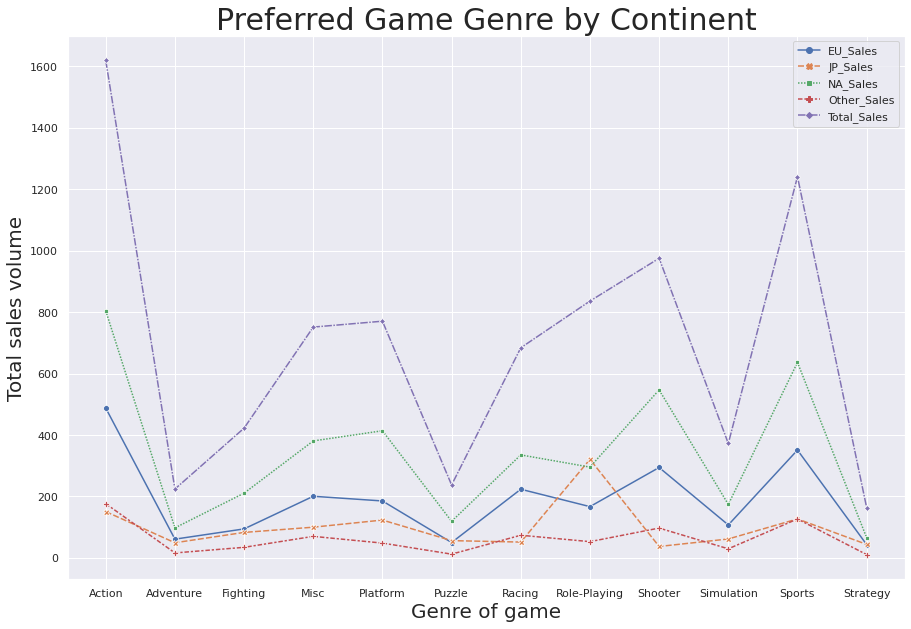

In [13]:
df_genre = df.groupby(by=['Genre'])['Total_Sales'].sum() # 전 대륙 선호하는 게임 장르
df_genre = df_genre.reset_index()

df_genre_na = df.groupby(by=['Genre'])['NA_Sales'].sum() # 북미 선호하는 게임 장르
df_genre_na = df_genre_na.reset_index()

df_genre_eu = df.groupby(by=['Genre'])['EU_Sales'].sum() # 유럽 선호하는 게임 장르
df_genre_eu = df_genre_eu.reset_index()

df_genre_jp = df.groupby(by=['Genre'])['JP_Sales'].sum() # 일본 선호하는 게임 장르
df_genre_jp = df_genre_jp.reset_index()

df_genre_ot = df.groupby(by=['Genre'])['Other_Sales'].sum() # 일본 선호하는 게임 장르
df_genre_ot = df_genre_ot.reset_index()

df_genre = df_genre.combine_first(df_genre_na).combine_first(df_genre_eu).combine_first(df_genre_jp).combine_first(df_genre_ot)
df_genre = df_genre.set_index("Genre")

sns.set(style='darkgrid')
plt.figure(figsize=(15, 10))
plt.title("Preferred Game Genre by Continent", fontsize=30)
plt.xlabel("Genre of game", fontsize=20)
plt.ylabel("Total sales volume", fontsize=20)

sns.lineplot(data=df_genre, markers=True);

# 대륙별 장르 판매량
- 전체적으로 액션 장르, 그 다음으로 스포츠의 수요가 많다.
- 일본만 예외적으로 롤플레잉 장르의 수요가 높았다.

In [14]:
# 장르별 총 판매량 
year_sale_dx = df.groupby(by=['Year', 'Genre'])['Total_Sales'].sum().reset_index()
year_sale = year_sale_dx.groupby(by=['Year'])['Total_Sales'].transform(max) == year_sale_dx['Total_Sales']
year_sale_max = year_sale_dx[year_sale].reset_index(drop=True)

In [15]:
genre = year_sale_max['Genre']

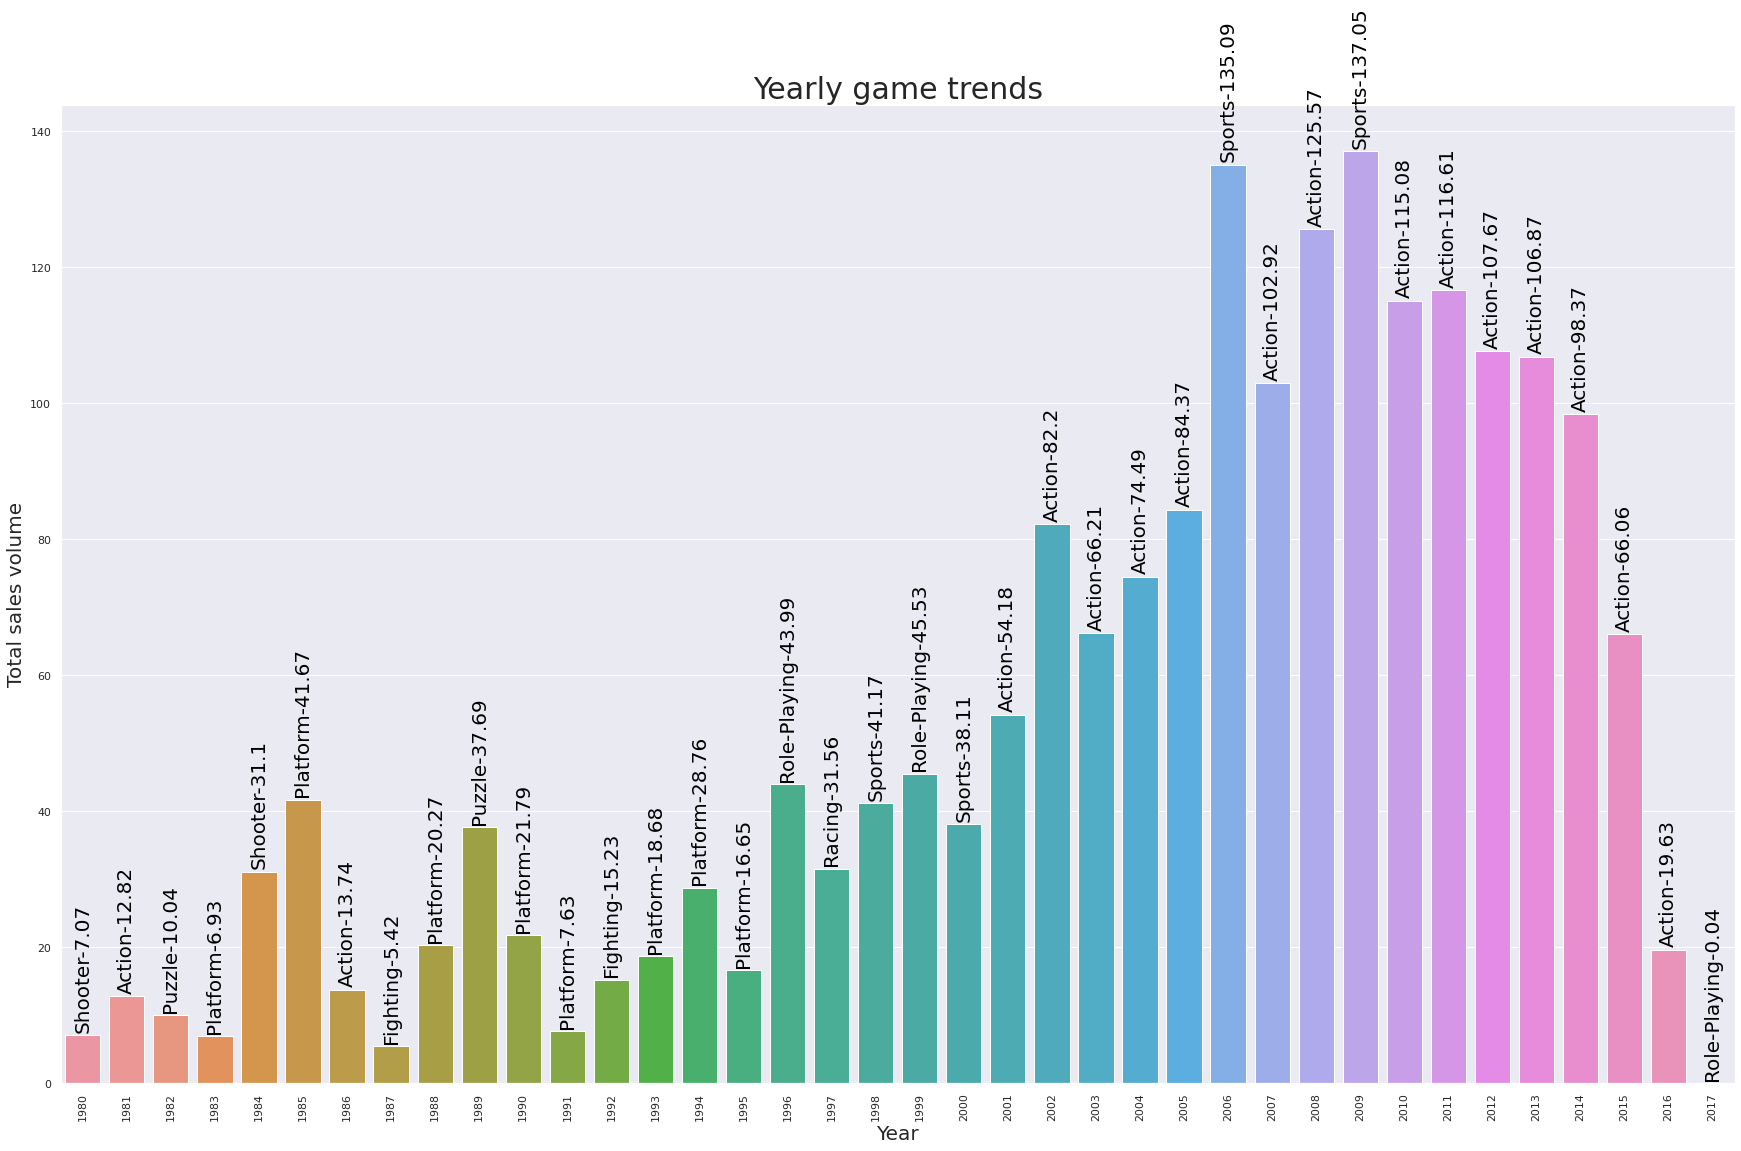

In [16]:
plt.figure(figsize=(30, 18))
g = sns.barplot(x='Year', y='Total_Sales', data=year_sale_max)
index = 0
for value in year_sale_max['Total_Sales']:
    g.text(index, value + 1, str(genre[index] + '-' +str(round(value, 2))), color='#000', size=20, rotation= 90, ha="center")
    index += 1

plt.title("Yearly game trends", fontsize=30)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Total sales volume", fontsize=20)

plt.xticks(rotation=90)
plt.show()

In [17]:
# 개별 게임 순위
sortdf = df.sort_values(by=['Total_Sales'], ascending=False)
top_game_sale = sortdf.head(20)
top_game_sale = top_game_sale[['Name', 'Year', 'Genre', 'Total_Sales']]
top_game_sale = top_game_sale.sort_values(by=['Total_Sales'], ascending=False)
top_game_sale = top_game_sale.reset_index(drop=True)
top_game_sale

,Name,Year,Genre,Total_Sales
0,Wii Sports,2006,Sports,82.74
1,Super Mario Bros.,1985,Platform,40.24
2,Mario Kart Wii,2008,Racing,35.83
3,Wii Sports Resort,2009,Sports,33.00
4,Pokemon Red/Pokemon Blue,1996,Role-Playing,31.38
5,Tetris,1989,Puzzle,30.26
6,New Super Mario Bros.,2006,Platform,30.01
7,Wii Play,2006,Misc,29.01
8,New Super Mario Bros. Wii,2009,Platform,28.61
9,Duck Hunt,1984,Shooter,28.31


In [18]:
name = top_game_sale['Name']
year = top_game_sale['Year']
y = np.arange(0, 20)

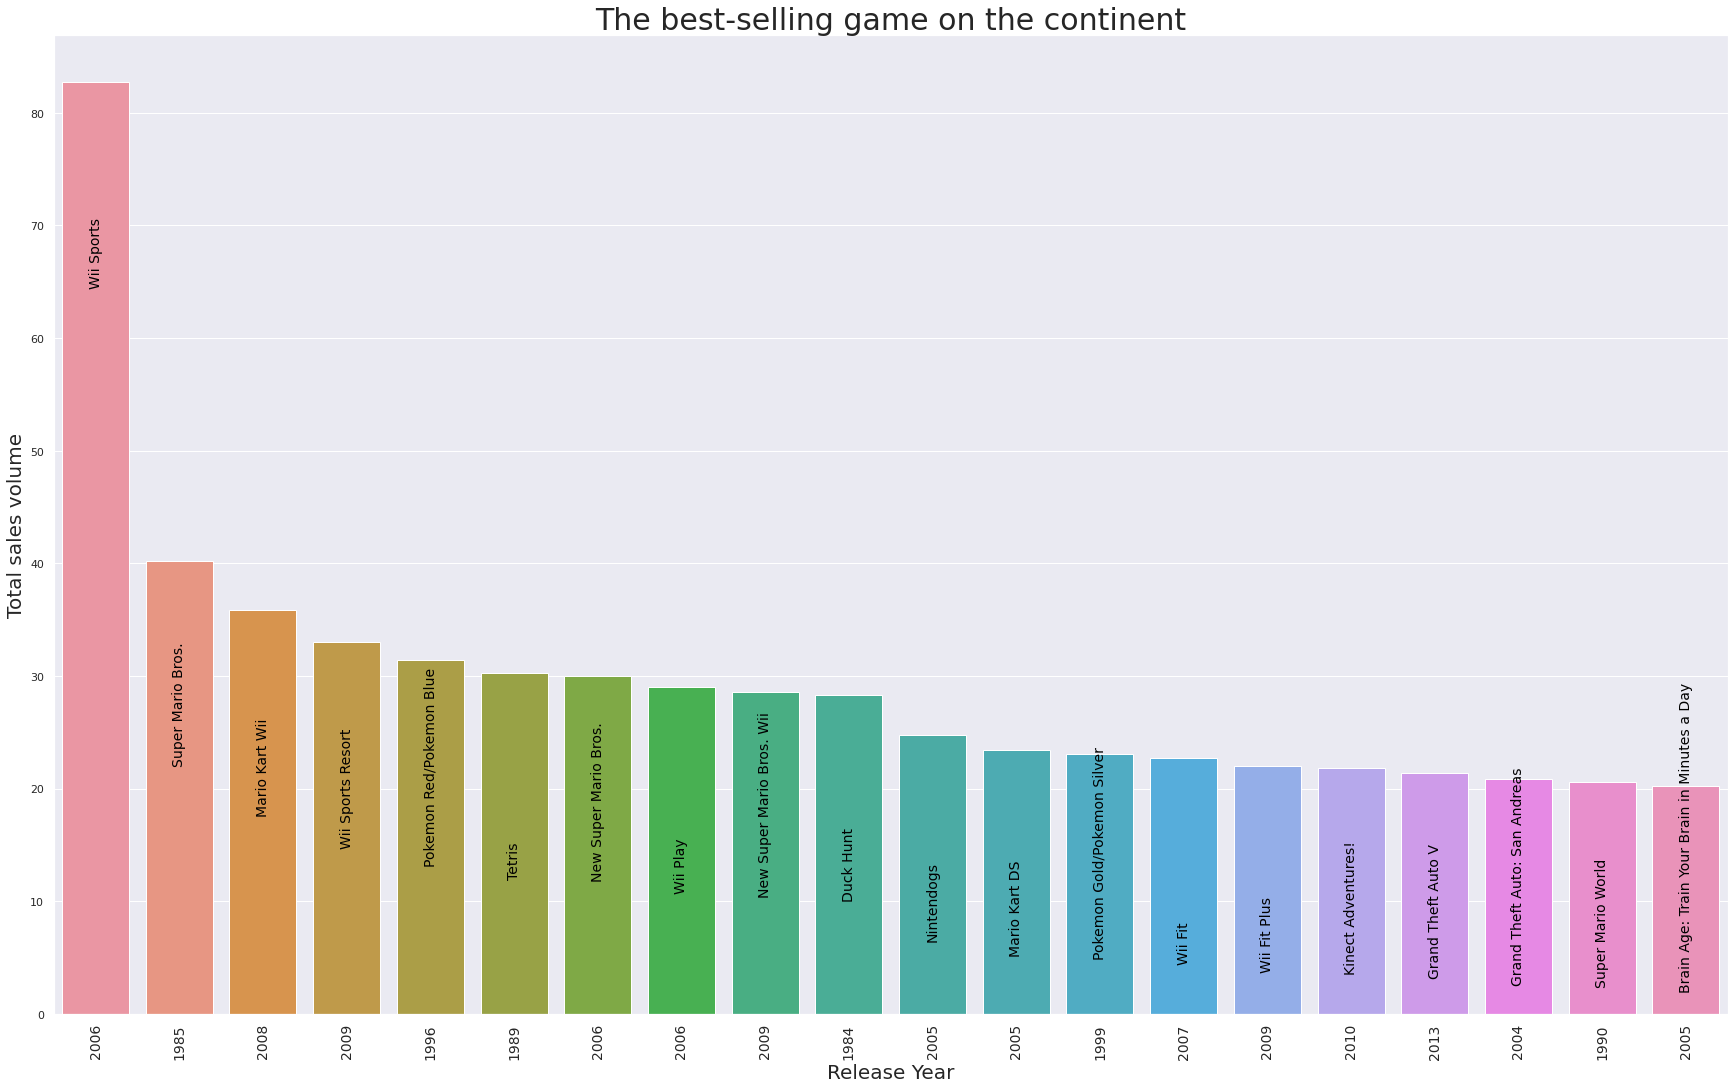

In [19]:
plt.figure(figsize=(30, 18))
g = sns.barplot(x='Name', y='Total_Sales', data=top_game_sale)
index = 0
for value in top_game_sale['Total_Sales']:
    g.text(index, value - 18, name[index], color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(y, top_game_sale['Year'], fontsize=14, rotation=90)
plt.title("The best-selling game on the continent", fontsize=30)
plt.xlabel("Release Year", fontsize=20)
plt.ylabel("Total sales volume", fontsize=20)
plt.show()

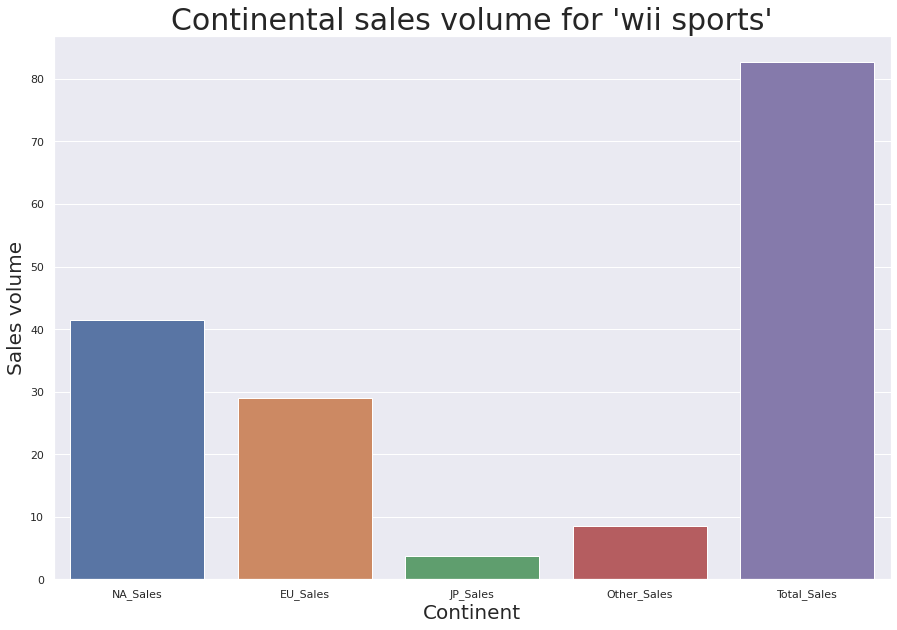

In [20]:
# 위 스포츠 매출 비교
df_1st = df[df['Name'] == 'Wii Sports']
df_1st = df_1st.drop(['Year'], axis=1)
sns.set(style='darkgrid')
plt.figure(figsize=(15, 10))
plt.title("Continental sales volume for 'wii sports'", fontsize=30)
plt.xlabel("Continent", fontsize=20)
plt.ylabel("Sales volume", fontsize=20)

sns.barplot(data=df_1st);

In [21]:
# 플랫폼 매출 비교
comp_platform = df[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_platform.head()

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,DS,0.04,0.00,0.00,0.00
1,Wii,0.17,0.00,0.00,0.01
2,PSP,0.00,0.00,0.02,0.00
3,DS,0.04,0.00,0.00,0.00
4,PS3,0.12,0.09,0.00,0.04


In [22]:
comp_platform = comp_platform.groupby(by=['Platform']).sum().reset_index()
comp_table = pd.melt(comp_platform, id_vars=['Platform'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_table.head()

,Platform,Sale_Area,Sale_Price
0,2600,NA_Sales,78.26
1,3DO,NA_Sales,0.00
2,3DS,NA_Sales,70.27
3,DC,NA_Sales,5.43
4,DS,NA_Sales,371.22


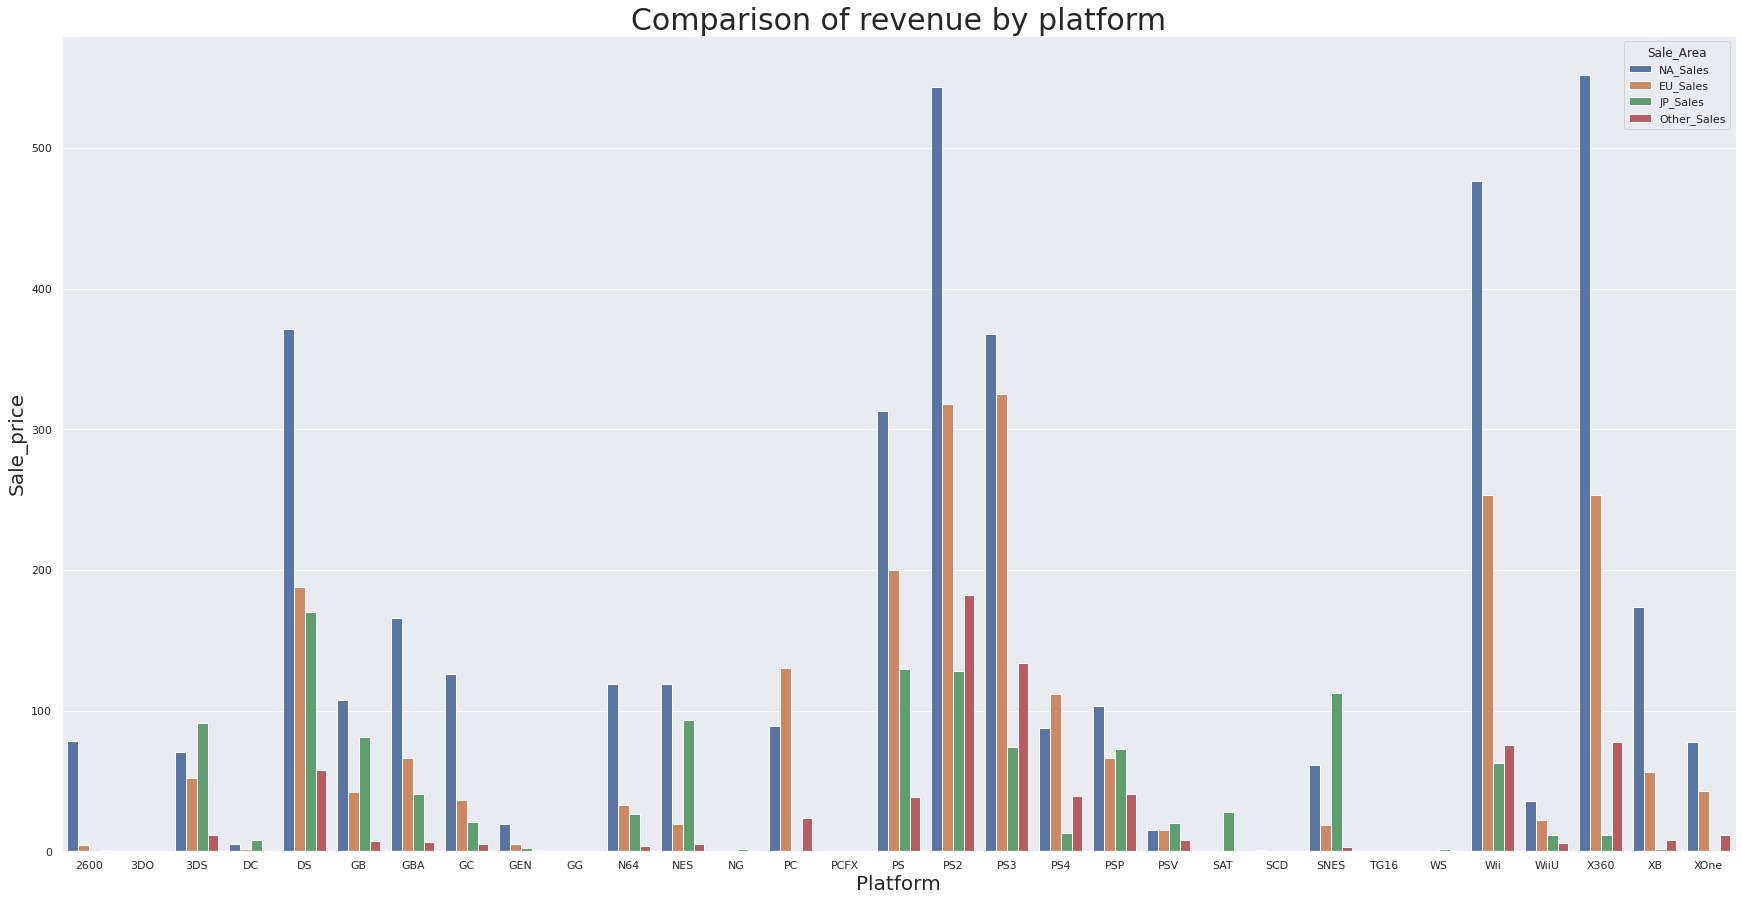

In [23]:
plt.figure(figsize=(30, 15))
sns.barplot(x='Platform', y='Sale_Price', hue='Sale_Area', data=comp_table)
plt.title("Comparison of revenue by platform", fontsize=30)
plt.xlabel("Platform", fontsize=20)
plt.ylabel("Sale_price", fontsize=20)
plt.show()

In [24]:
top_publisher = df.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).head(20)
top_publisher = pd.DataFrame(top_publisher).reset_index()

Text(0, 0.5, 'Sale_price')

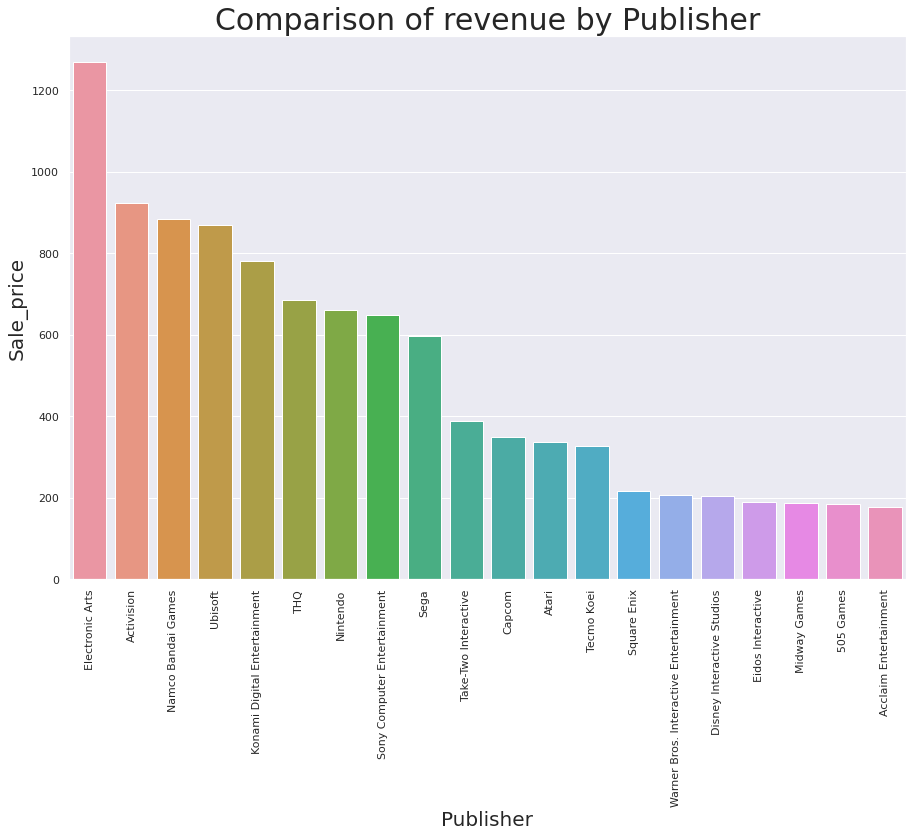

In [25]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Publisher", data=df, order = df.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).iloc[:20].index);
plt.xticks(rotation=90)
plt.title("Comparison of revenue by Publisher", fontsize=30)
plt.xlabel("Publisher", fontsize=20)
plt.ylabel("Sale_price", fontsize=20)

1. 일렉트로닉 아츠는 1982년에 설립된 세계적 규모의 게임 개발 및 유통업체이다. 본사는 미국 캘리포니아주 레드우드 시티에 있다. 일렉트로닉 아츠는 게임의 장르에 따라 크게 3가지의 브랜드 EA 게임즈, EA 스포츠, EA 비드로 나누어 유통하고 있다.

2. 액티비전 퍼블리싱 주식회사은 1979년 미국 캘리포니아주에서 설립된 비디오 게임 개발회사다. 1979년 10월 1일 설립되었다. 액티비전 이전에는 서드파티 개발사는 존재하지 않았다. 2008년 7월 9일 비방디 게임스와 합병을 완료하여 액티비전 블리자드로 출범하였다.

3. 주식회사 반다이 남코 엔터테인먼트는 아케이드 게임이나 비디오 게임 등, 게임 소프트의 제작 및 개발을 하는 일본의 기업이다. 

In [26]:
df_gta = df[df['Name'].str.contains('Grand Theft Auto')]
df_gta

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
761,Grand Theft Auto: Liberty City Stories,PSP,2005,Action,Take-Two Interactive,2.90,2.83,0.24,1.75,7.72
797,Grand Theft Auto: Vice City Stories,PS2,2007,Action,Take-Two Interactive,0.78,0.03,0.03,0.13,0.97
2008,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.99
2079,Grand Theft Auto: Vice City,PC,2003,Action,Take-Two Interactive,0.00,0.03,0.00,0.01,0.04
3447,Rockstar Games Double Pack: Grand Theft Auto I...,PS2,2003,Action,Take-Two Interactive,0.85,0.66,0.00,0.22,1.73
3483,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
3632,Grand Theft Auto: San Andreas,X360,2008,Action,Take-Two Interactive,0.08,0.03,0.00,0.01,0.12
5267,Rockstar Games Double Pack: Grand Theft Auto I...,XB,2003,Action,Take-Two Interactive,1.84,0.56,0.00,0.09,2.49
5318,Grand Theft Auto: Liberty City Stories,PS2,2006,Action,Take-Two Interactive,1.56,1.40,0.07,0.50,3.53
5340,Grand Theft Auto: Vice City,PS2,2002,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15


In [27]:
# gta의 총판매량
df_gta.sum()

Name           Grand Theft Auto: Liberty City StoriesGrand Th...
Platform       PSPPS2PS4PCPS2PS3X360XBPS2PS2PCDSGBAPCPSPPSPPS...
Year                                                       50149
Genre          ActionActionActionActionActionActionActionActi...
Publisher      Take-Two InteractiveTake-Two InteractiveTake-T...
NA_Sales                                                   64.11
EU_Sales                                                   48.64
JP_Sales                                                    3.71
Other_Sales                                                27.79
Total_Sales                                               144.25
dtype: object

In [28]:
df_1st

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2908,Wii Sports,Wii,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


In [29]:
# will sports 와 gta 비교
wiilist = [41.49, 29.02, 3.77, 8.46, 82.74]
gtalist = [64.11, 48.64, 3.71, 27.79, 144.25]
wiigta = pd.DataFrame({'Wii Sports': wiilist, 'GTA': gtalist}, index=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales'])
wiigta

,Wii Sports,GTA
NA_Sales,41.49,64.11
EU_Sales,29.02,48.64
JP_Sales,3.77,3.71
Other_Sales,8.46,27.79
Total_Sales,82.74,144.25


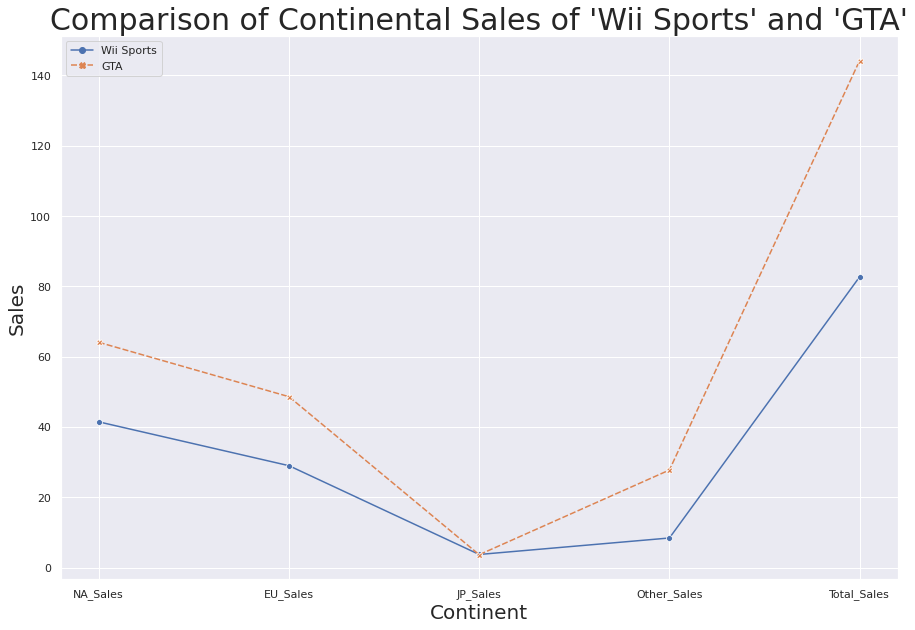

In [30]:
plt.figure(figsize=(15, 10))
plt.title("Comparison of Continental Sales of 'Wii Sports' and 'GTA'", fontsize=30)
plt.xlabel("Continent", fontsize=20)
plt.ylabel("Sales", fontsize=20)

sns.lineplot(data=wiigta, markers=True);

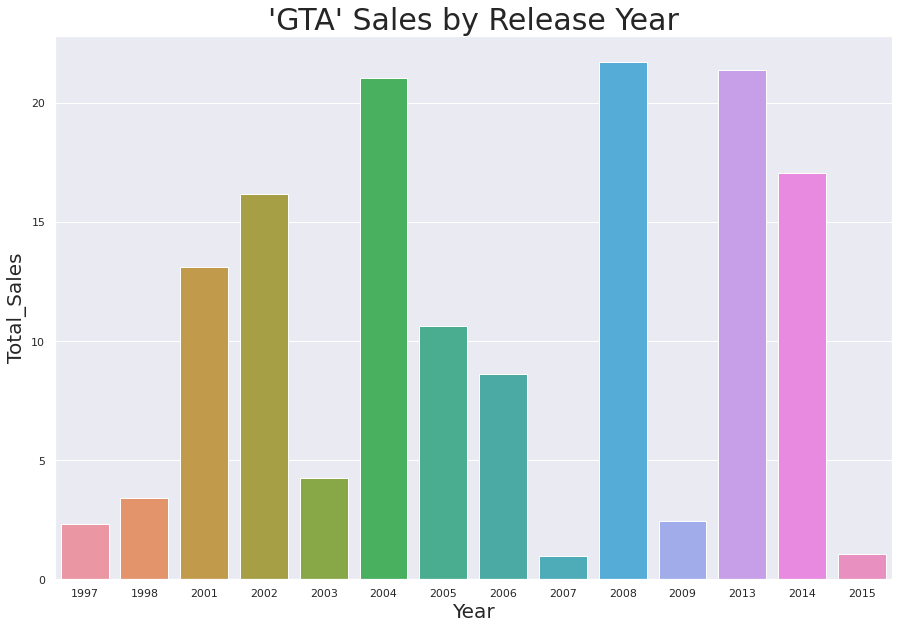

In [64]:
gtayear = df_gta.groupby('Year').sum()
gtayear = gtayear[['Total_Sales']]
gtayear = gtayear.reset_index()
gtayear
plt.figure(figsize=(15, 10))
plt.title("'GTA' Sales by Release Year", fontsize=30)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Sales", fontsize=20)
sns.barplot(x='Year', y='Total_Sales', data=gtayear);

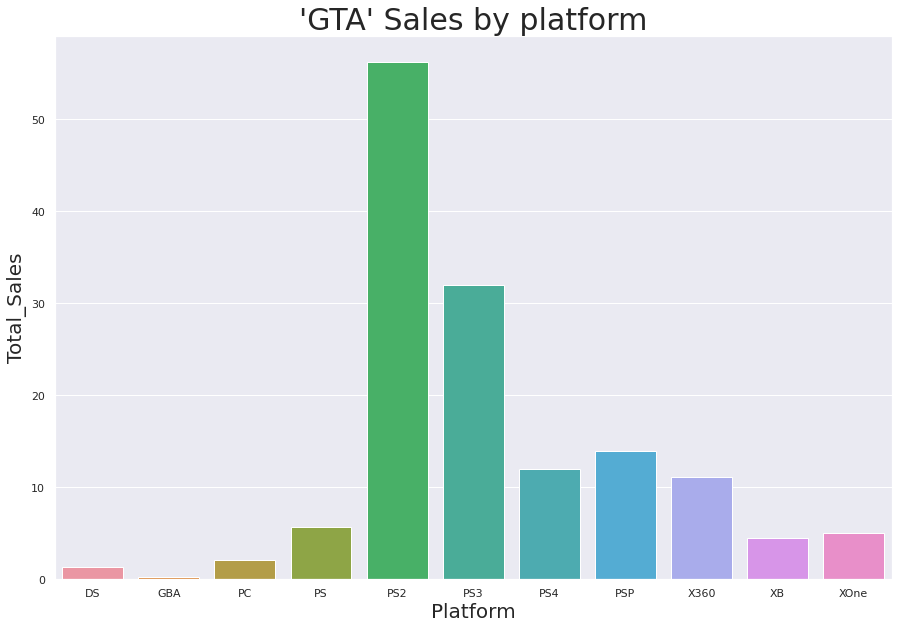

In [65]:
gtaplatform = df_gta.groupby('Platform').sum()
gtaplatform = gtaplatform[['Total_Sales']]
gtaplatform = gtaplatform.reset_index()
gtaplatform
plt.figure(figsize=(15, 10))
plt.title("'GTA' Sales by platform", fontsize=30)
plt.xlabel("Platform", fontsize=20)
plt.ylabel("Sales", fontsize=20)
sns.barplot(x='Platform', y='Total_Sales', data=gtaplatform);

In [72]:
# GTA가 출시 된 플랫 폼만 추출
nintendo = ["DS", "GBA"] 
pc = ['PC']
playstation = ["PS", "PS2", "PS3", "PS4", "PSP"]
xbox = ["X360", "XB", "XOne"]

def company(x):
    if x in nintendo:
        return 'Nintendo'
    elif x in pc:
        return 'PC'
    elif x in playstation:
        return 'Playstation'
    elif x in xbox:
        return 'Xbox'
    else: 
        return 'delete'

df['Company'] = df['Platform'].apply([company])
df_company = df[~df['Company'].str.contains('delete')]
df_company

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Company
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04,Nintendo
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02,Playstation
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04,Nintendo
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25,Playstation
5,Power Pro Kun Pocket 8,DS,2005,Sports,Konami Digital Entertainment,0.00,0.00,0.14,0.00,0.14,Nintendo
...,...,...,...,...,...,...,...,...,...,...,...
16590,White Album: Tsuzurareru Fuyu no Omoide,PS3,2010,Adventure,Aqua Plus,0.00,0.00,0.05,0.00,0.05,Playstation
16592,Minna no Chizu 2,PSP,2007,Misc,Zenrin,0.00,0.00,0.02,0.00,0.02,Playstation
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01,Playstation
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79,Playstation


In [107]:
df_gta['Company'] = df_gta['Platform'].apply([company])
gta_company = df_gta[~df_gta['Company'].str.contains('delete')]
gta_company.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Company
761,Grand Theft Auto: Liberty City Stories,PSP,2005,Action,Take-Two Interactive,2.90,2.83,0.24,1.75,7.72,Playstation
797,Grand Theft Auto: Vice City Stories,PS2,2007,Action,Take-Two Interactive,0.78,0.03,0.03,0.13,0.97,Playstation
2008,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.99,Playstation
2079,Grand Theft Auto: Vice City,PC,2003,Action,Take-Two Interactive,0.00,0.03,0.00,0.01,0.04,PC
3447,Rockstar Games Double Pack: Grand Theft Auto I...,PS2,2003,Action,Take-Two Interactive,0.85,0.66,0.00,0.22,1.73,Playstation


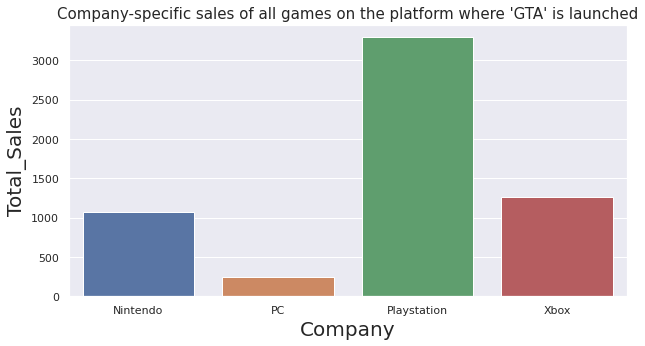

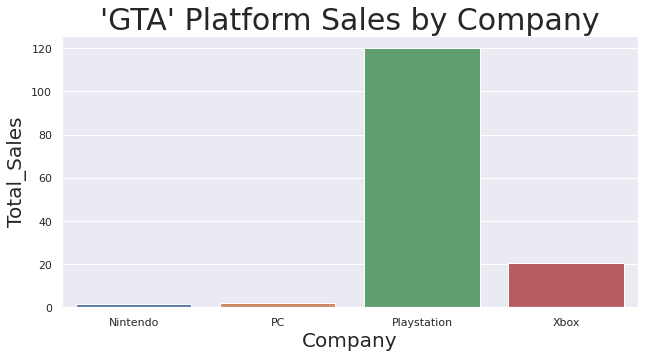

In [130]:
company_sale = df_company.groupby('Company').sum()
company_sale = company_sale[['Total_Sales']]
company_sale = company_sale.reset_index()
plt.figure(figsize=(10, 5))
plt.title("Company-specific sales of all games on the platform where 'GTA' is launched", fontsize=15)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Sales", fontsize=20)
sns.barplot(x='Company', y='Total_Sales', data=company_sale);

gta_company_sale = gta_company.groupby('Company').sum()
gta_company_sale = gta_company_sale[['Total_Sales']]
gta_company_sale = gta_company_sale.reset_index()
plt.figure(figsize=(10.33, 5))
plt.title("'GTA' Platform Sales by Company", fontsize=30)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Sales", fontsize=20)
sns.barplot(x='Company', y='Total_Sales', data=gta_company_sale);

In [133]:
# Nintendo에 대하여 비교
dcNintendo = df_company[df_company['Company'] == 'Nintendo']
dcNintendo = dcNintendo[['Total_Sales']]
print(dcNintendo.head())
gcNintendo = gta_company[gta_company['Company'] == 'Nintendo']
gcNintendo = gcNintendo[['Total_Sales']]
print(gcNintendo.head())

pv1 = stats.ttest_ind(dcNintendo,gcNintendo).pvalue
pv1

    Total_Sales
0          0.04
3          0.04
5          0.14
11         0.19
13         0.02
      Total_Sales
5662         1.35
5697         0.23


array([0.66608357])

In [134]:
# PC에 대하여 비교
dcpc = df_company[df_company['Company'] == 'PC']
dcpc = dcpc[['Total_Sales']]
print(dcpc.head())
gcpc = gta_company[gta_company['Company'] == 'PC']
gcpc = gcpc[['Total_Sales']]
print(gcpc.head())

pv2 = stats.ttest_ind(dcpc,gcpc).pvalue
pv2

    Total_Sales
6          0.03
12         0.02
16         0.04
19         0.02
27         0.29
       Total_Sales
2079          0.04
5396          0.01
6060          0.97
16575         1.08


array([0.4725324])

In [135]:
# Playstation에 대하여 비교
dcPlaystation = df_company[df_company['Company'] == 'Playstation']
dcPlaystation = dcPlaystation[['Total_Sales']]
print(dcPlaystation.head())
gcPlaystation = gta_company[gta_company['Company'] == 'Playstation']
gcPlaystation = gcPlaystation[['Total_Sales']]
print(gcPlaystation.head())

pv3 = stats.ttest_ind(dcPlaystation,gcPlaystation).pvalue
pv3

   Total_Sales
2         0.02
4         0.25
7         0.19
8         0.04
9         0.08
      Total_Sales
761          7.72
797          0.97
2008        11.99
3447         1.73
3483        21.39


array([4.05023838e-130])

In [136]:
# Xbox에 대하여 비교
dcXbox = df_company[df_company['Company'] == 'Xbox']
dcXbox = dcXbox[['Total_Sales']]
print(dcXbox.head())
gcXbox = gta_company[gta_company['Company'] == 'Xbox']
gcXbox = gcXbox[['Total_Sales']]
print(gcXbox.head())

pv4 = stats.ttest_ind(dcXbox,gcXbox).pvalue
pv4

    Total_Sales
22         0.10
23         0.01
32         0.16
39         0.24
44         0.93
       Total_Sales
3632          0.12
5267          2.49
10420         1.96
10834         5.08
13926        11.03


array([5.73944161e-10])